In [14]:
#Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
#Import files 

city_data = os.path.join('raw_data', 'city_data.csv')
ride_data = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

#city_df.count()

merged_df = city_df.merge(ride_df, on='city')

merged_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


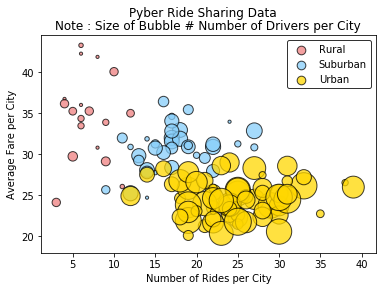

In [16]:

by_city = merged_df.groupby('city')
avg_fare = by_city.mean()['fare']
ride_count = by_city['ride_id'].count()
driver_count = by_city.mean()['driver_count']
city_type = city_df.set_index('city')['type']

city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_info.sort_values('Number of Drivers', ascending = False)

color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}


rural = city_info[city_info['Type of City'] == 'Rural']
urban = city_info[city_info['Type of City'] == 'Urban']
suburban = city_info[city_info['Type of City'] == 'Suburban']

city_color = {'Urban': color_scheme['Gold'], 
              'Suburban': color_scheme['Light Sky Blue'], 
              'Rural': color_scheme['Light Coral']}


plt.suptitle('Pyber Ride Sharing Data')

#scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Note : Size of Bubble # Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

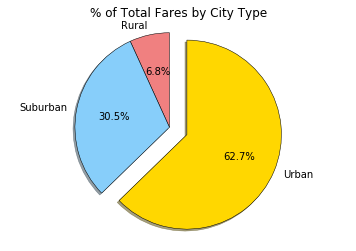

In [17]:
# % of Total Fares by City Type

#group by for all pie charts
by_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_type.sum()['fare']

labels = fare_sum.index

colors = [city_color[n] for n in labels]
explode = [0 , 0, .2]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

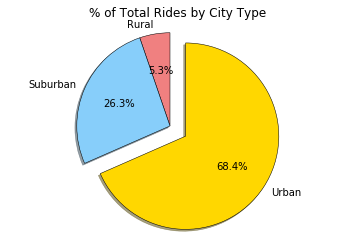

In [18]:
# % of Total Rides by City Type

# number of ride per city type
ride_sum = by_type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

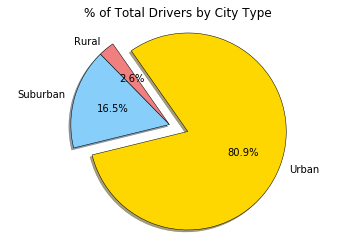

In [19]:
# % of Total Drivers by City Type

# of driver per city type
driver_sum = city_df.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()